In [217]:
!pip install catboost


In [218]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV





In [219]:
df=pd.read_csv("asthma_dataset.csv")

In [220]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,NaN,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,NaN,159


In [221]:
df.tail()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
295,296,25,Female,Current Smoker,No,NaN,283
296,297,20,Male,Ex-Smoker,No,NaN,202
297,298,25,Female,Non-Smoker,No,NaN,208
298,299,18,Male,Ex-Smoker,No,NaN,175
299,300,59,Female,Current Smoker,No,NaN,332


In [222]:
df.shape

(300, 7)

In [223]:
df.dtypes

Patient_ID           int64
Age                  int64
Gender              object
Smoking_Status      object
Asthma_Diagnosis    object
Medication          object
Peak_Flow            int64
dtype: object

In [224]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Smoking_Status        0
Asthma_Diagnosis      0
Medication          143
Peak_Flow             0
dtype: int64

In [225]:
mode_value = df['Medication'].mode()[0]
df['Medication'] = df['Medication'].fillna(mode_value)


In [226]:
df.isnull().sum()

Patient_ID          0
Age                 0
Gender              0
Smoking_Status      0
Asthma_Diagnosis    0
Medication          0
Peak_Flow           0
dtype: int64

In [227]:
df.describe()

,Patient_ID,Age,Peak_Flow
count,300.000000,300.000000,300.000000
mean,150.500000,39.666667,278.943333
std,86.746758,14.059675,72.861027
min,1.000000,18.000000,150.000000
25%,75.750000,27.000000,216.500000
50%,150.500000,39.000000,279.000000
75%,225.250000,51.000000,340.250000
max,300.000000,65.000000,400.000000


In [228]:
df['Asthma_Diagnosis'].value_counts()

Asthma_Diagnosis
Yes    157
No     143
Name: count, dtype: int64

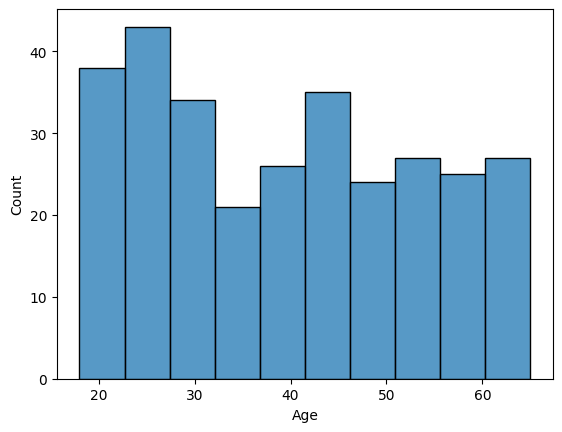

In [229]:
sns.histplot(x=df['Age'])
plt.show()

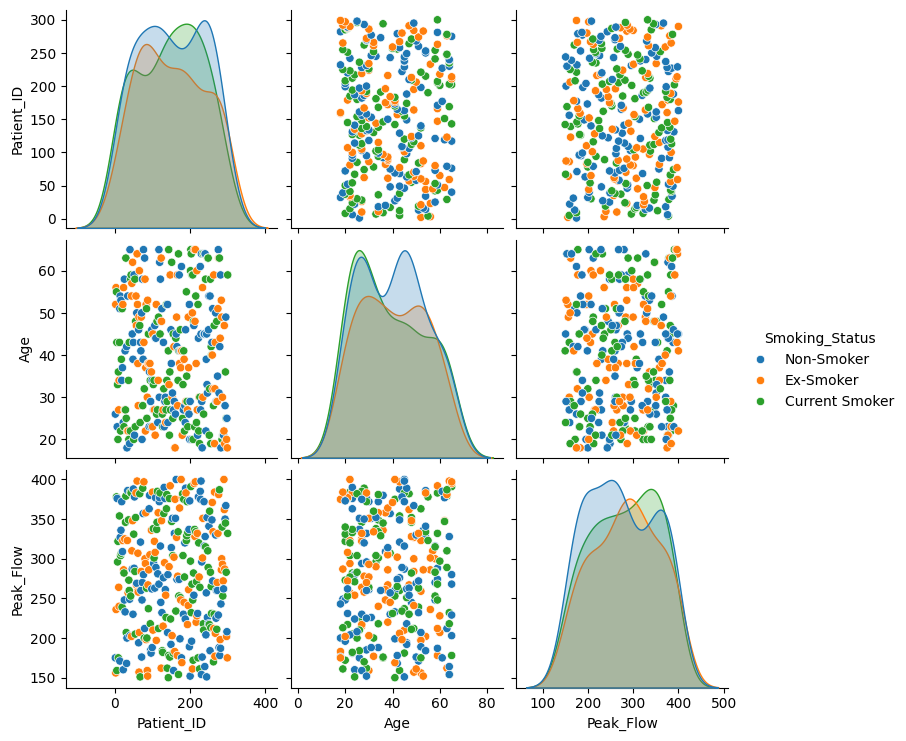

In [230]:
sns.pairplot(df, hue="Smoking_Status")
plt.show()

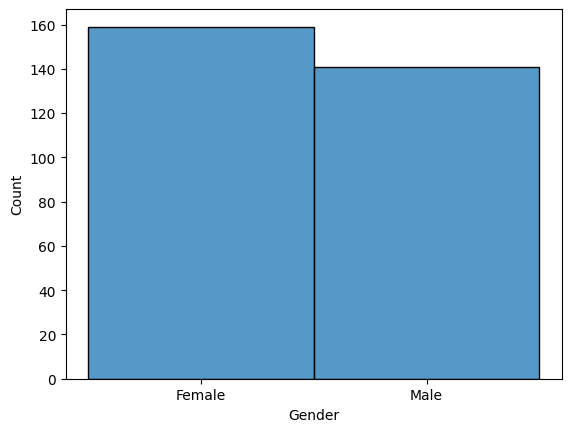

In [231]:
sns.histplot(x=df['Gender'])
plt.show()

In [232]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,Controller Medication,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,Controller Medication,159


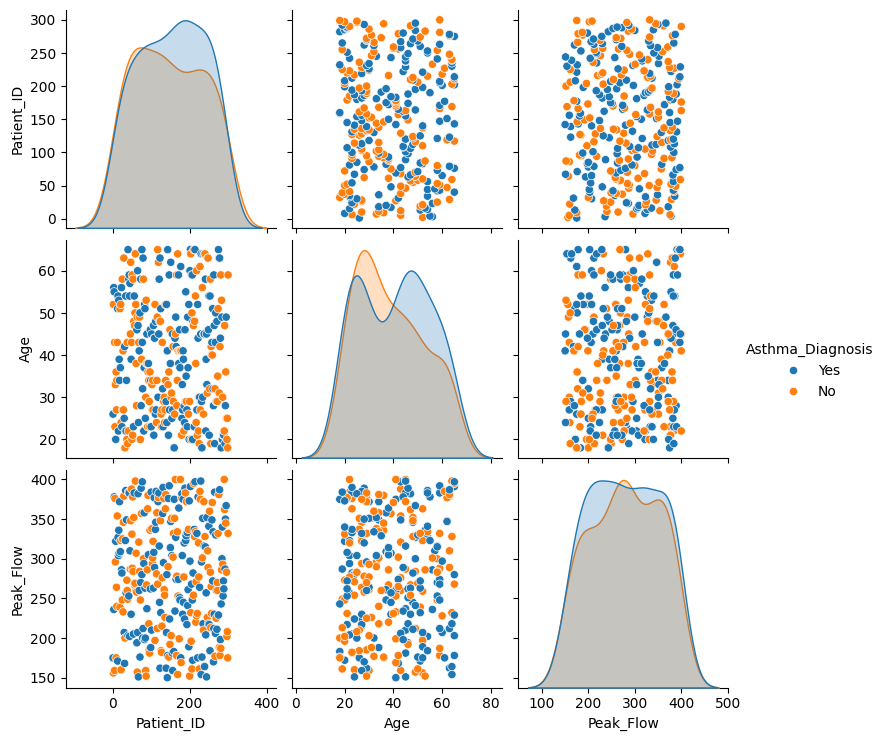

In [233]:
sns.pairplot(df, hue="Asthma_Diagnosis")
plt.show()

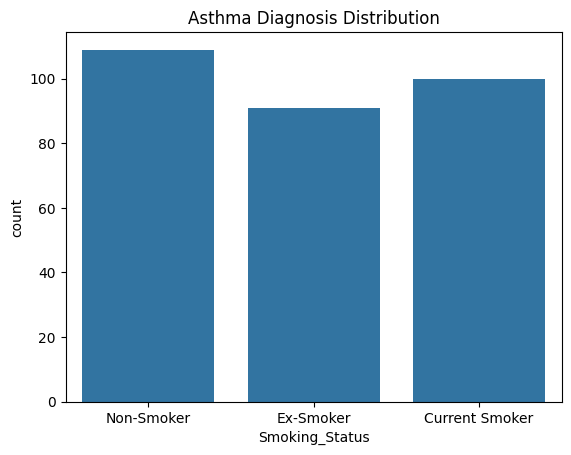

In [234]:
sns.countplot(x="Smoking_Status", data=df)
plt.title("Asthma Diagnosis Distribution")
plt.show()

In [235]:
X = df.drop(columns=[ 'Asthma_Diagnosis'])
y = df['Asthma_Diagnosis']

In [236]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,Controller Medication,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,Controller Medication,159


In [237]:
scaler = StandardScaler()
X[['Age', 'Peak_Flow']] = scaler.fit_transform(X[['Age', 'Peak_Flow']])

In [238]:
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X, y)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

ValueError: 
All the 1440 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Male'

--------------------------------------------------------------------------------
1152 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Female'


In [ ]:
categorical_cols = ['Gender', 'Smoking_Status', 'Medication']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Check shapes
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)

# Confirm shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(iterations=1000, depth=8, learning_rate=0.05, verbose=100, random_seed=42)
}
results={}

In [ ]:
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

In [ ]:
print("\n Model Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

In [252]:
import os
print(os.getcwd())


C:\Users\hp\OneDrive\Desktop\COPD Project Machine Learning\anaconda_projects\db


In [254]:
import pickle
pickle.dump(model,open('model.pkl','wb'))